# Marcadores ARUCO

## Deteção básica

In [10]:
import cv2
import cv2.aruco as aruco
import numpy as np 
import sys 

import matplotlib.pyplot as plt

In [2]:
frame_bgr = cv2.imread("aruco_frame.png")

In [3]:
frame = frame_bgr

In [5]:
 gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#--- Define the aruco dictionary
aruco_dict  = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
# parameters  = aruco.DetectorParameters_create()
# parameters.minDistanceToBorder = 0
# parameters.adaptiveThreshWinSizeMax = 1000

corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict) #, parameters=parameters)

for i in range(len(ids)):
    print('ID: {}'.format(ids[i]))

    print(type(corners[i]))
    print(corners[i].shape)


    for c in corners[i]: 
        for canto in c:
            print("Corner {}".format(canto))

for i in ids:
    print("ID i {}".format(i))



ID: [23]
<class 'numpy.ndarray'>
(1, 4, 2)
Corner [204. 287.]
Corner [311. 272.]
Corner [320. 359.]
Corner [217. 376.]
ID: [12]
<class 'numpy.ndarray'>
(1, 4, 2)
Corner [902. 232.]
Corner [1011.  245.]
Corner [999. 335.]
Corner [892. 322.]
ID i [23]
ID i [12]


In [7]:
aruco.drawDetectedMarkers(frame, corners, ids);

In [8]:
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

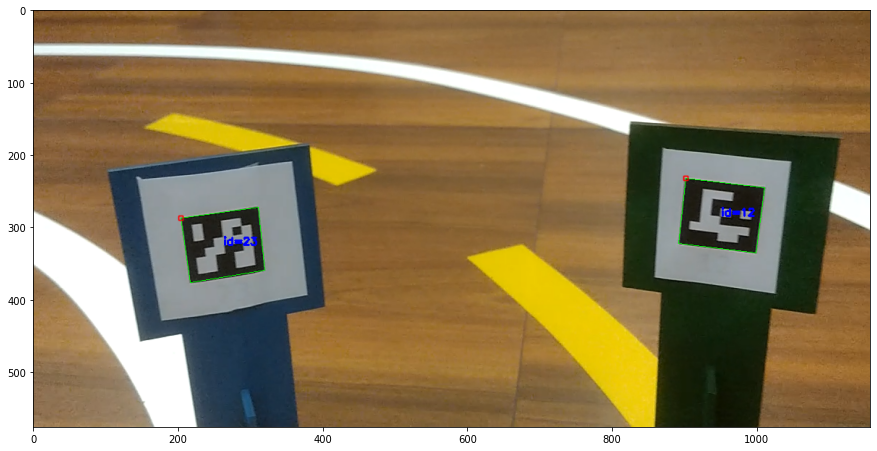

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(rgb)

Vamos explorar a estrutura *corners* 

In [14]:
corners

[array([[[204., 287.],
         [311., 272.],
         [320., 359.],
         [217., 376.]]], dtype=float32),
 array([[[ 902.,  232.],
         [1011.,  245.],
         [ 999.,  335.],
         [ 892.,  322.]]], dtype=float32)]

Vemos que **corners** é uma lista, e que **cada corner** é um array. Notemos ainda que o **corner** sempre aparece ordenado a partir do ponto marcado em vermelho, e no sentido horário. 

In [15]:
ids

array([[23],
       [12]], dtype=int32)

Desta forma, se quisermos medir uma lateral do quadrado para ter uma ideia simples da dimensão do tamanho do marker, deveremos fazer, para subtrair a coordenada $x$ dos primeiros 2 pontos: 

In [16]:
index = 0 # Vamos pegar para o marker de ID 23

In [18]:
abs(corners[index][0][0][0] - corners[index][0][1][0] )

107.0

Portanto vemos que o marker com id 23 aparece com dimensão aproximada de $107$.